<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M1/Notebooks/assignments/assignment2_solution_py_UML_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install hdbscan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Unsupervised ML

In [ ]:
data = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/pokemon.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
Number            800 non-null int64
Name              800 non-null object
Type1             800 non-null object
HitPoints         800 non-null int64
Attack            800 non-null int64
Defense           800 non-null int64
SpecialAttack     800 non-null int64
SpecialDefense    800 non-null int64
Speed             800 non-null int64
Generation        800 non-null int64
Legendary         800 non-null bool
dtypes: bool(1), int64(8), object(2)
memory usage: 63.4+ KB


In [ ]:
data.head()

,Number,Name,Type1,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,39,52,43,60,50,65,1,False


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
data_num = data.loc[:,'HitPoints': 'Generation']

data_scaled = StandardScaler().fit_transform(data_num)

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(data_scaled)

In [ ]:
pca.components_.shape

(4, 7)

In [ ]:
sum(pca.explained_variance_ratio_)

0.7980734261924601

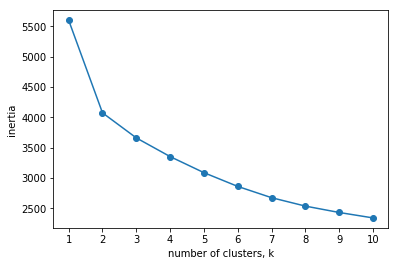

In [ ]:
# Import K-means
from sklearn.cluster import KMeans

# Run loop to get inertia for different cluster sizes
inertia = []
for i in range(1,11):
  k_means = KMeans(n_clusters=i)
  inertia.append(k_means.fit(data_scaled).inertia_)

# Displaying the inertia by cluster
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1,11))
plt.show()

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
model.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
data['cluster'] = model.labels_

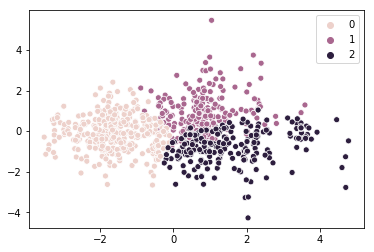

In [ ]:
sns.scatterplot(data_reduced[:,0],data_reduced[:,1], hue=model.labels_)

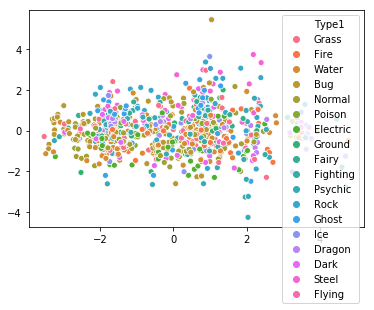

In [ ]:
sns.scatterplot(data_reduced[:,0],data_reduced[:,1], hue=data['Type1'])

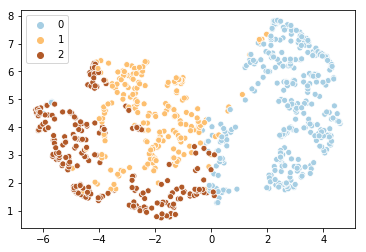

In [ ]:
# A different and more advanced way of visualizing
import umap
# Note that the standard setting of UMAP will produce 2 dimensions

embedding = umap.UMAP().fit_transform(data_reduced)
                                      
                                      
sns.scatterplot(embedding[:,0],embedding[:,1], hue=model.labels_, palette = 'Paired')

In [ ]:
import hdbscan

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, 
                            min_samples=5, 
                            leaf_size=6, 
                            #core_dist_n_jobs=16, 
                            prediction_data=True)
hdbscan_model.fit(embedding)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=6,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=10, min_samples=5, p=None,
        prediction_data=True)

In [ ]:
data['cluster_hdbscan'] = hdbscan_model.labels_

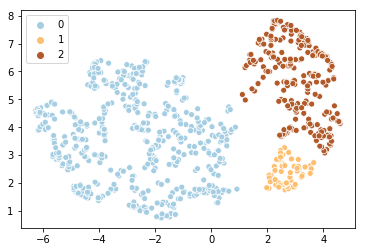

In [ ]:
sns.scatterplot(embedding[:,0],embedding[:,1], hue=hdbscan_model.labels_, palette = 'Paired')

In [ ]:
pd.crosstab(data['Type1'], data['cluster'], normalize='columns')

cluster,0,1,2
Type1,,,
Bug,0.122807,0.063348,0.054852
Dark,0.035088,0.031674,0.050633
Dragon,0.023392,0.022624,0.080169
Electric,0.046784,0.022624,0.097046
Fairy,0.023392,0.027149,0.012658
Fighting,0.029240,0.045249,0.029536
Fire,0.061404,0.027149,0.105485
Flying,0.002924,0.000000,0.012658
Ghost,0.038012,0.045249,0.037975


In [ ]:
pd.crosstab(data['Type1'], data['cluster_hdbscan'], normalize='columns')

cluster_hdbscan,0,1,2
Type1,,,
Bug,0.075397,0.033333,0.122881
Dark,0.041667,0.016667,0.038136
Dragon,0.049603,0.016667,0.025424
Electric,0.061508,0.066667,0.038136
Fairy,0.017857,0.016667,0.029661
Fighting,0.035714,0.016667,0.033898
Fire,0.067460,0.083333,0.055085
Flying,0.005952,0.000000,0.004237
Ghost,0.039683,0.016667,0.046610


# Supervised ML

In [ ]:
data_ml = pd.get_dummies(data.loc[:,'Type1':'Generation'])

In [ ]:
data_ml_scaled = StandardScaler().fit_transform(data_ml)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_ml_scaled, data['Legendary'].astype(int), test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import Classification Report for evaluatoion of performance
from sklearn.metrics import classification_report

# Install an updated version of the MLxtend library 
!pip install -U mlxtend

# modules confusion matrixs
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.17.0)


### Models

In [ ]:
classifier = LogisticRegression()

scores = cross_val_score(classifier, X_train, y_train, cv=5)
print(sum(scores)/len(scores))

classifier.fit(X_train,y_train)
print(classifier.score(X_test,y_test))

0.9400105331388755
0.96


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       187
           1       0.65      0.85      0.73        13

    accuracy                           0.96       200
   macro avg       0.82      0.91      0.86       200
weighted avg       0.97      0.96      0.96       200



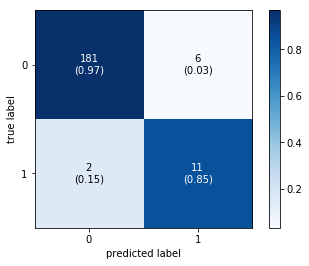

In [ ]:
y_pred = classifier.predict(X_test)

confmatrix = confusion_matrix(y_test,y_pred) 

# plotting the confusion matrix
plot_confusion_matrix(conf_mat=confmatrix, colorbar=True, show_absolute=True, show_normed=True)

# printing the clasification report displaying further metrics
print(classification_report(y_test, y_pred))

In [ ]:
classifier = DecisionTreeClassifier()

scores = cross_val_score(classifier, X_train, y_train, cv=5)
print(sum(scores)/len(scores))

classifier.fit(X_train,y_train)
print(classifier.score(X_test,y_test))

0.9183569460842189
0.935


              precision    recall  f1-score   support

           0       0.98      0.95      0.96       187
           1       0.50      0.69      0.58        13

    accuracy                           0.94       200
   macro avg       0.74      0.82      0.77       200
weighted avg       0.95      0.94      0.94       200



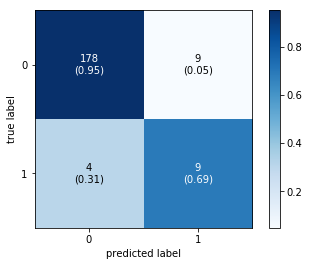

In [ ]:
y_pred = classifier.predict(X_test)

confmatrix = confusion_matrix(y_test,y_pred) 

# plotting the confusion matrix
plot_confusion_matrix(conf_mat=confmatrix, colorbar=True, show_absolute=True, show_normed=True)

# printing the clasification report displaying further metrics
print(classification_report(y_test, y_pred))

In [ ]:
classifier = RandomForestClassifier()

scores = cross_val_score(classifier, X_train, y_train, cv=5)
print(sum(scores)/len(scores))

classifier.fit(X_train,y_train)
print(classifier.score(X_test,y_test))


0.9466636571984166
0.945


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       187
           1       0.62      0.38      0.48        13

    accuracy                           0.94       200
   macro avg       0.79      0.68      0.72       200
weighted avg       0.94      0.94      0.94       200



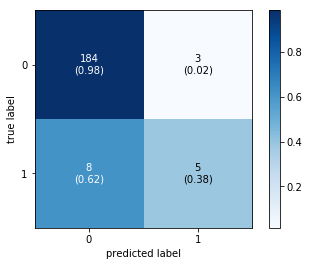

In [ ]:
y_pred = classifier.predict(X_test)

confmatrix = confusion_matrix(y_test,y_pred) 

# plotting the confusion matrix
plot_confusion_matrix(conf_mat=confmatrix, colorbar=True, show_absolute=True, show_normed=True)

# printing the clasification report displaying further metrics
print(classification_report(y_test, y_pred))

In [ ]:
import xgboost as xgb

classifier = xgb.XGBClassifier()

classifier.fit(X_train,y_train)

classifier.score(X_test, y_test)

0.945

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       187
           1       0.58      0.54      0.56        13

    accuracy                           0.94       200
   macro avg       0.78      0.76      0.77       200
weighted avg       0.94      0.94      0.94       200



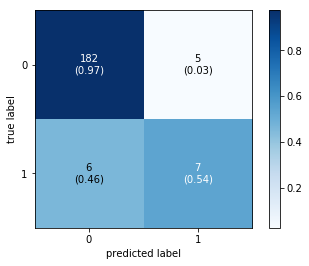

In [ ]:
y_pred = classifier.predict(X_test)

confmatrix = confusion_matrix(y_test,y_pred) 

# plotting the confusion matrix
plot_confusion_matrix(conf_mat=confmatrix, colorbar=True, show_absolute=True, show_normed=True)

# printing the clasification report displaying further metrics
print(classification_report(y_test, y_pred))

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

classifier = CatBoostClassifier(task_type='GPU')

classifier.fit(X_train,y_train)

classifier.score(X_test, y_test)

Learning rate set to 0.014499
0:	learn: 0.6614209	total: 49.6ms	remaining: 49.5s
1:	learn: 0.6359166	total: 87.4ms	remaining: 43.6s
2:	learn: 0.6151980	total: 137ms	remaining: 45.6s
3:	learn: 0.5935982	total: 175ms	remaining: 43.6s
4:	learn: 0.5753111	total: 224ms	remaining: 44.5s
5:	learn: 0.5563409	total: 272ms	remaining: 45.1s
6:	learn: 0.5352398	total: 326ms	remaining: 46.3s
7:	learn: 0.5166266	total: 378ms	remaining: 46.8s
8:	learn: 0.4984311	total: 406ms	remaining: 44.7s
9:	learn: 0.4805111	total: 436ms	remaining: 43.2s
10:	learn: 0.4694792	total: 466ms	remaining: 41.9s
11:	learn: 0.4539568	total: 511ms	remaining: 42s
12:	learn: 0.4374594	total: 556ms	remaining: 42.2s
13:	learn: 0.4232366	total: 607ms	remaining: 42.7s
14:	learn: 0.4098538	total: 649ms	remaining: 42.6s
15:	learn: 0.3982606	total: 690ms	remaining: 42.4s
16:	learn: 0.3861107	total: 732ms	remaining: 42.3s
17:	learn: 0.3742549	total: 780ms	remaining: 42.6s
18:	learn: 0.3690469	total: 810ms	remaining: 41.8s
19:	learn: 

0.955

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       187
           1       0.67      0.62      0.64        13

    accuracy                           0.95       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.95      0.95      0.95       200



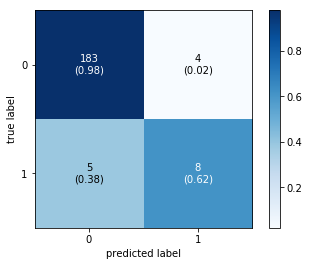

In [ ]:
y_pred = classifier.predict(X_test)

confmatrix = confusion_matrix(y_test,y_pred) 

# plotting the confusion matrix
plot_confusion_matrix(conf_mat=confmatrix, colorbar=True, show_absolute=True, show_normed=True)

# printing the clasification report displaying further metrics
print(classification_report(y_test, y_pred))